In [1]:
import kagglehub

In [6]:
path = kagglehub.dataset_download("yashpalthakor/fmnist-small-csv")
print("Path: ",path)

100%|██████████| 3.37M/3.37M [00:00<00:00, 74.6MB/s]

Extracting files...
Path:  /root/.cache/kagglehub/datasets/yashpalthakor/fmnist-small-csv/versions/1


In [7]:
dataset_path = "/root/.cache/kagglehub/datasets/yashpalthakor/fmnist-small-csv/versions/1/fmnist_small.csv"

In [8]:
import numpy as np
import pandas as pd

In [9]:
df = pd.read_csv(dataset_path)

In [10]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


In [11]:
df.shape

(6000, 785)

In [12]:
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [13]:
torch.manual_seed(42)

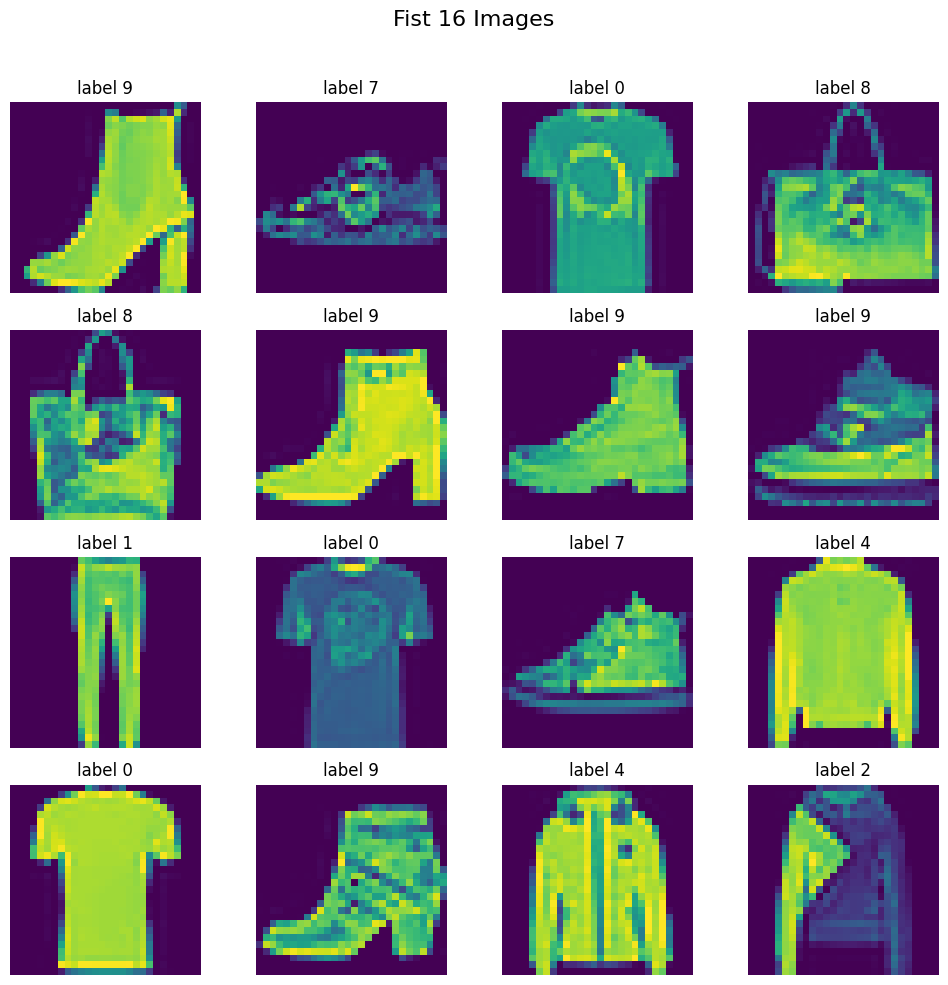

In [18]:
fig, axes = plt.subplots(4,4, figsize=(10,10))
fig.suptitle("Fist 16 Images", fontsize=16)

# plot the fist 16 images from the dataset
for i, ax in enumerate(axes.flat):
  img = df.iloc[i, 1:].values.reshape(28,28)
  ax.imshow(img)
  ax.axis("off")
  ax.set_title(f"label {df.iloc[i, 0]}")
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

In [19]:
# train test df
x = df.iloc[:, 1:].values
y = df.iloc[:,0].values

In [20]:
# train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [21]:
# scaling the features
x_train = x_train/255.0
x_test = x_test/255.0

In [41]:
# create CustomDataset class
class CustomDataset(Dataset):
  def __init__(self, features, labels):
    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self,index):
    return self.features[index], self.labels[index]


In [42]:
# create train dataset object
train_dataset = CustomDataset(x_train, y_train)

In [26]:
len(train_dataset)

4800

In [43]:
# create test dataset object
test_dataset = CustomDataset(x_test, y_test)

In [44]:
# create train and test loader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [45]:
# define NN class
class MyNN(nn.Module):
  def __init__(self, num_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10),
        # nn.Softmax()
    )

  def forward(self, x):
    return self.model(x)

In [46]:
# set learning rate and epochs
learning_rate = 0.1
epochs = 100

In [47]:
# initiate the model
model = MyNN(x_train.shape[1])
# loss function
criterion = nn.CrossEntropyLoss()
# optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [49]:
# training loop
for epoch in range(epochs):
  total_epoch_loss = 0
  for batch_features, batch_labels in train_loader:
    # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = criterion(outputs, batch_labels)

    # clear gradients
    optimizer.zero_grad()

    # back pass
    loss.backward()

    # update grads
    optimizer.step()
    total_epoch_loss = total_epoch_loss + loss.item()
  avg_loss = total_epoch_loss/len(train_loader)
  print(f"Epoch: {epoch+1}, Average loss:{avg_loss}")

Epoch: 1, Average loss:1.3099208931128183
Epoch: 2, Average loss:0.7678338533639908
Epoch: 3, Average loss:0.6399586445093155
Epoch: 4, Average loss:0.5803462948401769
Epoch: 5, Average loss:0.5229050257802009
Epoch: 6, Average loss:0.4884455607334773
Epoch: 7, Average loss:0.4674109177788099
Epoch: 8, Average loss:0.4362910772363345
Epoch: 9, Average loss:0.4210603176554044
Epoch: 10, Average loss:0.4027697741985321
Epoch: 11, Average loss:0.38227320472399395
Epoch: 12, Average loss:0.3768009560306867
Epoch: 13, Average loss:0.3427226368089517
Epoch: 14, Average loss:0.3333789757390817
Epoch: 15, Average loss:0.3230056936045488
Epoch: 16, Average loss:0.31703360681732495
Epoch: 17, Average loss:0.3012018896639347
Epoch: 18, Average loss:0.28033063232898714
Epoch: 19, Average loss:0.2737907705704371
Epoch: 20, Average loss:0.2661758814752102
Epoch: 21, Average loss:0.25941791077454884
Epoch: 22, Average loss:0.2425503764798244
Epoch: 23, Average loss:0.23889096488555273
Epoch: 24, Aver

In [50]:
# set model eval model
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [52]:
# evaluation code
total = 0
correct = 0

with torch.no_grad():
  for batch_features, batch_labels in test_loader:
    outputs = model(batch_features)
    _,predicted = torch.max(outputs, 1)
    total = total + batch_labels.shape[0]
    correct = correct + (predicted == batch_labels).sum().item()
print(correct/total)

0.8333333333333334
tensor([10.9234, 57.2789, 19.6995, 27.3945, 21.2312, 17.2324, 26.7643, 13.3549,
        28.3220, 28.1828, 25.3178, 19.9847, 37.6512, 26.5963, 33.9361, 24.3280])
